## **Data Preparation & Processing**

### **2. Methodology**

#### **2.1. Uploaded CSV Files to R:** 
CSV files were then downloaded and imported into 'R'. Datasets were renamed when downloaded with easy, consistent naming conventions for 'R' (e.g., dailyactivity, dailysleep). These files were named within folders that align with this format: 
DailyData_2016_04-05_12.

#### **2.2. Installed and Loaded Common Packages and Libraries:** 
Common packages and libraries for data cleaning, processing, analysing and visualizations like tidyverse, here, skimr, janitor were installed and loaded:
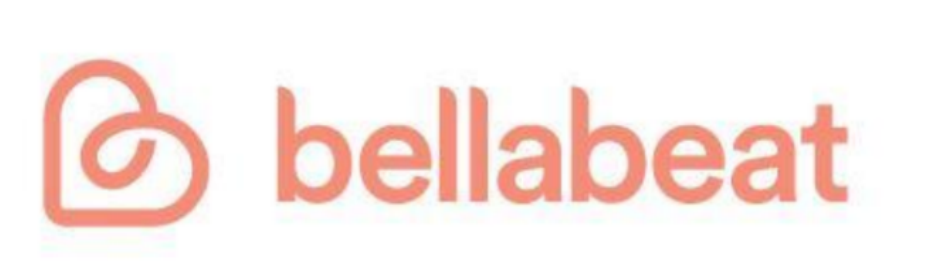

In [1]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




#### **2.3. Imported Datasets and Created Data Frames:** 
To load the data from the imported CSV files, data frames were created for each file: 

In [2]:
dailyactivity <- read.csv("../input/d/daisyicardi/fitbit/dailyactivity.csv")
dailysleep <- read.csv("../input/d/daisyicardi/fitbit/dailysleep.csv")
heartrate <- read.csv("../input/d/daisyicardi/fitbit/heartrateseconds.csv")
weight <- read.csv("../input/d/daisyicardi/fitbit/weightloginfo.csv")

#### **2.4. Explored Data:**
To inspect a short and simple overview of the columns and the first several rows in each data frame, the head function was utilised. This is particularly useful to understand which columns would be of the most interest for the task at hand. It also helps highlight if there are any problems with the data that may need to be sorted and cleaned prior to analysis.

In [3]:
head(dailyactivity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


The columns: total steps, total calories, total distance, very active, moderately active or lightly active distance as well as very active, fairly active or lightly active minutes would be of particular interest for the task at hand. Likewise, the total sedentary minutes in a day column would be of particular interest for this task. The columns related to Id and Activity Date would also be of interest as they correspond to the observations of the individual and the date it occurred over the month. 

Contrastingly, the tracker distance column appears to be a duplicate column of the total distance column, to which could be removed from the data frame. It also appears that the Sedendary Active Distance column as well as the Logged Activities Distance column may not elucidate any particular information, with consistent values of 0, although this will be investigated further when the view function is utilised. 

In [4]:
head(dailysleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


With regard to sleep, all columns aside from the total sleep records columns could provide meaningful insights for Bellabeat. This is because it is unclear what the Boolean values of 1 and 2 mean. Of note however, it appears the sleepday column has both the date and time included within one column. This will perhaps need rectifying later on if want to explore the days of week in which individuals used their trackers the most, or the time in which they were most active on their non-Bellabeat device.

In [5]:
head(heartrate)

,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


All columns of interest. Alike the dailysleep data frame, time and date are formatted within one column in this dataframe. This may need rectifying if want to explore which times individuals were most stressed or which days of the week individuals were most stressed. 

In [6]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


The columns that would be of interest here are related to the weight (in kilograms), fat, BMI and ID as well as date. The weight in pounds is a repeat of information within the kilograms column and therefore could be removed. The 'fat' column also appears to have a lot of NA values, which will potentially require dropping. Likewise, "LogId" column contains irrelevant information for Bellabeat, as a unique Id has already been given. 

#### **2.5. Inspected Data for Errors:**

> **2.5.1. Checked the Internal Structure of Data Frames:** 
To inspect the data for errors, it was deemed necessary to further understand the internal structure of the data frames (e.g., column names) and variables (e.g., whether numerical or character-type data) to elucidate whether any columns required renaming or if any data types included require converting to the appropriate data type. To this aim, the structure function was utilised for all data frames. This function was utilised over the glimpse() and colnames() functions as it provides all the information the output of these functions provide collectively, but in one output only. 

In [7]:
str(dailyactivity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In the dailyactivity data frame, there were 15 columns. Most variables were represented by numerical values (8 variables), with integer values following (6 variables). One variable was represented by character-string type data (the Activity Date). The format of dates within R is often yyyy-mm-dd. As the current activity date column is formatted as mm-dd-yyyy, this was considered problematic among the data analytics team, requiring converting to appropriate date formatting so that the date is recognized by 'R' and can be analysed. There were a few other problematic observations here: the column names for very active distance, **moderately** active distance and **light** active distance are similar to column names very active minutes, **fairly** active minutes and **lightly** active minutes, but also **differed** in minor ways. It is important to keep column names consistent. Therefore, it was considered to rename the column name 'fairly active minutes' to 'moderately active minutes', and the 'light active distance' to be renamed to 'lightly active distance'. Also, all column names have various capitalizations across the variable. It is important to put all variables in lowercase as R is case sensitive. As there will likely be merging of documents, it is important all variables are consistent across data frames.

In [8]:
str(dailysleep)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


The dailysleep data frame has 5 columns. The sleepday column (containing date and time) is represented by character-string data. This requires converting to appropriate date-times formatting. It is unclear what information the total sleep records column provides. As such, it could be dropped from the data frame. 

In [9]:
str(heartrate)

'data.frame':	2483658 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: int  97 102 105 103 101 95 91 93 94 93 ...


The heartrate data frame has 3 columns containing Id information, date and time plus the value of the resting heartrate every 5-10 seconds. Date and time again here is represented by character-string data, requiring conversion to date-time formatting. 

In [10]:
str(weight)

'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


The weight data frame has 8 columns containing ID information, date and time, weight information (both in kilograms and pounds), fat and BMI information plus the logid as well as information regarding whether the weight was entered in manually or tracked automatically by the Fitbit ('IsManualReport' column). The date and time is entered as character string data, requiring converting to date and time formatting. 

>**2.5.2. Checked for Null or Missing Values:**
To further inspect errors, null or missing values within each data frame were checked. This was achieved by using the is.na() function. 

In [11]:
sum(is.na(dailyactivity))
sum(is.na(dailysleep))
sum(is.na(heartrate))
sum(is.na(weight))

[1] 0

[1] 0

[1] 0

[1] 65

It is clear only the weight data frame appears to have a lot of missing or null values. When we have a deeper look at the null values within the weight data frame, we can see below that a lot of these null values are entered in within the column named 'Fat'. It may mean any conclusions involving body fat may not be as reliable as body 'Fat' was not accurately tracked across all participants. Indeed, only one individual had tracked their body fat twice over the course of the month. The data analytics team therefore deemed it should be dropped from the data frame. 

In [12]:
is.na(weight)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


>**2.5.3. Checked for Duplicate Records:**
Any duplicate records were also checked using the duplicate function. 

In [13]:
sum(duplicated(dailyactivity))
sum(duplicated(dailysleep))
sum(duplicated(heartrate))
sum(duplicated(weight))

[1] 0

[1] 3

[1] 0

[1] 0

While most have no duplicate records within their data frames, the daily sleep data frame has 3 duplicate records which will require removing when cleaning. To investigate the duplicate records further, we can use the get_dupes() function which will show us the exact observations that are considered duplicate records:

In [14]:
get_dupes(dailysleep)

No variable names specified - using all columns.




Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,dupe_count
<dbl>,<chr>,<int>,<int>,<int>,<int>
4388161847,5/5/2016 12:00:00 AM,1,471,495,2
4388161847,5/5/2016 12:00:00 AM,1,471,495,2
4702921684,5/7/2016 12:00:00 AM,1,520,543,2
4702921684,5/7/2016 12:00:00 AM,1,520,543,2
8378563200,4/25/2016 12:00:00 AM,1,388,402,2
8378563200,4/25/2016 12:00:00 AM,1,388,402,2


>**2.5.4. Checked for Unique Id Values:**
As the data source stated that 30 Fitbit Users had consented to being tracked and giving personal information, it is important to cross-check the number of participants that actually took part in Fitbit tracking. To this aim, the n_distinct() function was utilised.  

In [15]:
n_distinct(dailyactivity$Id)
n_distinct(dailysleep$Id)
n_distinct(heartrate$Id)
n_distinct(weight$Id)

[1] 33

[1] 24

[1] 14

[1] 8

It is clear that the dataset description is inconsistent with the dataset itself. 3 more users had been personally tracked than what was described for the dailyactivity data frame. Of note, there are at least 6 individuals that did not have their sleep tracked accurately or there is missing data for these individuals. Likewise, more than 16 (for heartrate) and 22 (for weight) individuals did not have their heartrate or weight accurately tracked, or at least, there is no data for these individuals. This could affect the reliability of conclusions from the analysis.

#### **2.6. Cleaned Data:**
>**2.6.1. Subsetted Data Frames:** Across the data frames, there were a number of columns that do not elucidate any insightful information for the task at hand. It was therefore essential to subset data to pull the most appropriate information for answering the research questions. This was achieved utilising the select() function. Changes were cross-checked utilising the colnames() function. 

In [16]:
dailyactivity <- subset(dailyactivity, select = -c(TrackerDistance, LoggedActivitiesDistance, SedentaryActiveDistance))
weight <- subset(weight, select = -c(WeightPounds, Fat, LogId))

Only the two data frames above required the data analytics team to subset data. The other data frames had included columns that were of interest for the task at hand and did not require subsetting.

>**2.6.2. Renamed Columns, Cleaned Column Names:** It was clear most columns required renaming to better elucidate the information included within the column. This was considered a crucial step not only for readability purposes but also important if files require merging. If files require merging, both primary and foreign keys must be present within a data frame to link and differentiate each other to and from the other. 

In [17]:
dailyactivity <- dailyactivity %>%  
  rename(Daily_Steps=TotalSteps) %>% 
  rename(Daily_Distance=TotalDistance) %>% 
  rename(LightlyActiveDistance=LightActiveDistance) %>% 
  rename(ModeratelyActiveMinutes=FairlyActiveMinutes) %>% 
  rename(Daily_Calories=Calories)  

dailysleep <- dailysleep %>% 
  rename(SleepDate=SleepDay)

heartrate <- heartrate %>% 
  rename(Date_Time=Time) 

weight <- weight %>% 
  rename(Date_Time=Date)

When we cross-check the columns have been renamed correctly, we notice that most files have a date-time component. While the hourly files (hourlycalories/steps/intensities) have a date-time format that is consistent across each other, the date and times within the weight and heartrate files are not consistent. The date-time component within the weight data frame is random, with some individuals manually reporting at different times of the day. The date-time format within the heartrate dataframe, is every 5-10 seconds unlike the hourly date and time component. Therefore, one of the columns was renamed to avoid confusion between data frames if merging all files.

In [18]:
weight <- weight %>% 
  rename(weight_Date_Time=Date_Time) 

Additionally, as R is case and space sensitive, it is important to keep colum names in lower case and consistent of 0 spaces. The clean_names() and rename_with() functions were utilised for this: 

In [19]:
dailyactivity <- rename_with(dailyactivity,tolower) 
dailyactivity <- clean_names(dailyactivity)

dailysleep <- rename_with(dailysleep,tolower) 
dailysleep <- clean_names(dailysleep)

heartrate <- rename_with(heartrate,tolower) 
heartrate <- clean_names(heartrate)

weight <- rename_with(weight,tolower) 
weight <- clean_names(weight)

>**2.6.3. Removed Duplicates:**
Only the dailysleep data frame required duplicates removed. To remove the 3 duplicate records from the data frame, the unique function was utilised. 

In [20]:
dailysleep <- unique(dailysleep)

An operator was assigned to save the function across the whole data frame so that when doing calculations, the duplicate records are not included. To cross-check these were indeed removed, the number of observations within the data frame was checked utilising the nrow() function. 

>**2.6.4. Fixed Date Character-String Data:**
The daily sleep and daily activity data frames had entered dates within one column, formatted as a character string data type. For R to recognise dates, they must be accurately entered in the format in which R recognises dates  especially if want to inspect particular days of the week in which individuals were most active. For R to recognise the dates in the daily activity and daily sleep data frame, the following code was utilised:

In [21]:
dailyactivity$activitydate <- as.Date(dailyactivity$activitydate, format = "%m/%d/%Y")
dailysleep$sleepdate <- as.Date(dailysleep$sleepdate, format = "%m/%d/%Y")

The formatting of the daily activity and daily sleep data frames were cross-checked utilising the head() function. 
> **2.6.5. Fixed Date-Time Character Data:** It is important to note that the weight and heartrate data frame will also require reformatting of their dates. However, as the data frames also have a time component, a different set of codes will be employed for R to recognise the time and date components within the weight and heartrate data frames. The following codes were utilised:

In [22]:
heartrate$date_time <- parse_date_time(heartrate$date_time, "%m/%d/%Y %I:%M:%S %p")
weight$weight_date_time <- parse_date_time(weight$weight_date_time, "%m/%d/%Y %I:%M:%S %p")

#### **2.7. Documentation of Transformation and Manipulation of Data:**
This stage involved merging, grouping, sorting and joining data frames (manipulation of data) as well as involved mutating, separating and/or uniting columns so that information therein can be effectively used for analysis (transformation of data). Questions the data analytics team had informed the subsequent transformation and manipulation of data. 

> **2.7.1. Created a new Data Frame Summarising How Many Days over the Month Individuals used their Device for Specific Features:** To this aim, a new data frame for each data frame (dailyactivity, dailysleep, heartrate and weight) was created to calculate the number of days individuals successively utilised their device for these features. All observations were grouped by ID, and individuals were then classified a light, moderate or high user based on the amount of successive days they utilised their device: 


In [23]:
activity_use <- dailyactivity %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(activity_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  )) %>%
drop_na()

sleep_use <- dailysleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(sleep_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  )) %>%
drop_na()

heartrate_use <- heartrate %>%
  group_by(id) %>%
  summarize(days_used=sum(n()/86400)) %>%
  mutate(heartrate_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  ))

weight_use <- weight %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(weight_tracker_usage = case_when(
    days_used < 11 ~ "Light User",
    days_used >= 11 & days_used <= 20 ~ "Moderate User", 
    days_used >= 21 & days_used <= 31 ~ "High User", 
  )) 

> **2.7.2. Merged Usage Data Frame to existing Data Frames:** As the usage data frames above were grouped by 'id', the 'id' column can act as a link to merge data frames together. This is exemplified in the code below. 

In [24]:
dailyactivity_use <- merge(activity_use, dailyactivity, by=c('id'))
dailysleep_use <- merge(sleep_use, dailysleep, by=c('id'))
dailyheartrate_use <- merge(heartrate_use, heartrate, by=c('id'))
dailyweight_use <- merge(weight_use, weight, by=c('id'))

> The data frames developed above will act as the primary data frames within which the data analytics team explore questions further.

> **2.7.3. Added corresponding Weekdays to all Data Frames:**
To understand non-Bellabeat device usage across the days of the week, the data analytics team used the weekdays() function to add a new column containing information of the day of the week to the corresponding date and/or time within the data frame:

In [25]:
dailyactivity_use$weekday <- weekdays(dailyactivity$activitydate)
dailysleep_use$weekday <- weekdays(dailysleep$sleepdate)
dailyheartrate_use$weekday <- weekdays(heartrate$date_time)
dailyweight_use$weekday <- weekdays(weight$weight_date_time)

> The weekdays() function could be utilised as date and time was already classed as either POSIXct or Date rather than characters. If it were still formatted as character string data, the mutate function with the strtime function would have had to been utilised. 

> **2.7.4. Added Content-Specific columns to Data Frames:**
> The content-specific columns added to each data frame are explained in this section below.

>><u>**2.7.4.1.Daily Activity:**</u>

>>Eight content-specific columns were added to the dailyactivity_use data frame: 

>>**1. Added a column for the Total Minutes in which Individuals were Active:** It was clear that while there was a column for the daily total distance of each individual, there was not a column for the daily total minutes in which individuals were active. Therefore, it was important to add this column:

In [26]:
dailyactivity_use <- mutate(dailyactivity_use, daily_active_minutes=veryactiveminutes + moderatelyactiveminutes + lightlyactiveminutes)

>>This column would assist in understanding the total time in which individuals were active, which could then later be compared to how much time they spent sedentary. This could inform the data analytics team as to whether push notifications are necessary for this sample. 

>>**2. Combined Very Active and Moderately Active Minute Columns:** 
According to research funded by the National Institute of Health Research but conducted by [Lee and colleagues (2022)](https://sbgg.org.br/wp-content/uploads/2022/07/1658917123_1_Physical_Activity_Intensity_and_All-Cause.pdf), individuals should aim for exercising for at least 43 minutes each day in moderate physical activity, and 21-43 minutes in vigorous physical activity or an equivalent combination of the two (32-64 minutes) to lower their mortality rate. Given this, it was considered necessary to combine the columns veryactiveminutes and moderatelyactiveminutes to understand whether individuals met these recommendations on a daily basis in the analysis phase:

In [27]:
dailyactivity_use <- mutate(dailyactivity_use, combined_active_mins=veryactiveminutes + moderatelyactiveminutes)

>> **3. Added a Column Categorising whether Individuals Met, Surpassed or did not Meet Combined Activity Recommendations:** As mentioned, it was important to understand whether individuals met these recommendations on a daily basis. The combined_active_mins column was utilised to add another column to determine whether individuals met, surpassed or did not meet these recommendations:

In [28]:
dailyactivity_use <- mutate(dailyactivity_use, activity_recommendations =case_when(
    combined_active_mins < 32 ~ "not met",
    combined_active_mins > 64 ~ "surpassed",
    between(combined_active_mins,32,64) ~ "met"
          )
      )

>> **4. Added a Column Categorising whether Individuals Met, Surpassed or Did not Meet Step Recommendations:** Similarly, while there are no specific distance recommendations for how far an individual should travel on a daily basis (as some individuals may not even be able to step outside of their home for example), step recommendations have been made for decreasing risk of death and/or health problems. According to a recent meta-analysis of 15 international cohorts conducted by [Paluch and colleagues (2022)](https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(21)00302-9/fulltext), individuals under the age of 60 had a decreased risk of death if they walked an average of 8,000 to 10,000 steps on a daily basis. Consequently, a column was added to decipher whether individuals met, surpassed or did not meet these recommendations:

In [29]:
dailyactivity_use <- mutate(dailyactivity_use, step_recommendations =case_when(
    daily_steps > 10000 ~ "surpassed",
    daily_steps < 8000 ~ "not met",
    between(daily_steps,8000,10000) ~ "met",
          )
      )

>> **5. Added Three Columns exploring Wear Trends:** As the dailyactivity data frame was originally comprehensive with minutes allocated to each activity tracked (e.g., very active minutes, sedentary minutes), all these columns were combined to attain the total minutes in which the user wore their device. A percentage was then allocated to the proportion of the day the device was worn. Categories (e.g., if individuals wore their device all day, more than half the day, around half the day or less than half the day) were created to represent the percentages. The following code represents this:

In [30]:
dailyactivity_use <- dailyactivity_use %>% 
  mutate(total_minutes_worn = veryactiveminutes+moderatelyactiveminutes+lightlyactiveminutes+sedentaryminutes) %>%
  mutate(percent_minutes_worn = (total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_minutes_worn == 100 ~ "All Day",
    percent_minutes_worn < 100 & percent_minutes_worn >= 60 ~ "More than half day", 
    percent_minutes_worn < 50 & percent_minutes_worn > 0 ~ "Less than half day",
    between(percent_minutes_worn,50,60) ~ "Around half day",
  ))

>><u>**2.7.4.2.Daily Sleep:**</u> One content-specific column was added to the dailysleep data frame:

>>**1. Added a column for Total amount of Time Awake:** It was considered crucial to add a column for the total time awake as the total time in bed column includes total time asleep, which may limit abilities to compare the amount of time individuals spent asleep versus awake:

In [31]:
dailysleep_use <- mutate(dailysleep_use, totaltimeawake= totaltimeinbed-totalminutesasleep)

>> **2. Added a column determining the Sleep Efficiency of Individuals:** Sleep efficiency is often referred to the percentage comparison of time a person is asleep versus the amount of time a person spends in bed.  The percentage is calculated by dividing Total Sleep Time by Total Time in bed. Normal healthy sleep efficiency is considered to be 80% or greater. As such, a column determining individual's sleep efficiency was added. A column categorising whether the percentage obtained was healthy or not was also added:  

In [32]:
dailysleep_use <- mutate(dailysleep_use, sleep_efficiency_percent=totalminutesasleep/totaltimeinbed * 100)

dailysleep_use <- mutate(dailysleep_use, efficiency_type=case_when(
        sleep_efficiency_percent < 80 ~ "Unhealthy",
        sleep_efficiency_percent > 80 ~ "Healthy",
          )
      )

>> **3. Added a Column Categorising whether Individuals had an optimal, moderate or poor sleep:** The data analytics team then added a column categorising whether individuals, had an optimal, moderate or poor sleep on a daily basis. While it is often recommended by medical practitioners that adults sleep between 7-9 hours [(e.g., Olson, 2023)](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-20057898), research into the physiology of sleep stages, has determined the body cycles through four stages that last approximately 90 minutes long [(Patel et al., 2024)](https://www.ncbi.nlm.nih.gov/books/NBK526132/). Consequently, sleep was defined as either optimal, moderate or poor in accordance with the collective current research:
>>* **An optimal sleep:** was defined in the current research as 7.5 hours or 9 hours of sleep. 
>>* **A moderate sleep:** If adults slept for 7 hours or slept in between 7.5-9 hours, this was considered a moderate sleep. 
>>* **A poor sleep:** If adults slept less than 7 hours or more than 9 hours, this was considered a poor sleep. 

>> The following code represents this:

In [33]:
dailysleep_use <- mutate(dailysleep_use, sleep_type =case_when(
          totalminutesasleep == 540 ~ "optimal",
          totalminutesasleep == 450 ~ "optimal",
          totalminutesasleep > 540 ~ "poor",
          totalminutesasleep < 420 ~ "poor",
          between(totalminutesasleep,421,449) ~ "moderate",
          between(totalminutesasleep,451,539) ~ "moderate",
          )
      )

>>**4. Added a Column Categoring Awake Period Length Recommendations:** The data analytics team also added a column categorising whether individuals had a long, short or normal 'awake' sleep stage. As mentioned, there are four stages of sleep that your body experiences each night. This includes: light sleep, deep sleep (also known as slow wave sleep), REM (rapid eye movement) sleep and awake. The amount of time an individual will spend in each stage varies from night to night. However, companies like [WHOOP](https://www.whoop.com/us/en/thelocker/average-sleep-stages-time/) who monitor their customers' physiological data 24/7, have shown that individuals on average spend:

>>* 3:28-3:59 in Light Sleep (44-51%)
>>* 1:44-2:00 in REM Sleep (22-26%)
>>* 1:23-1:32 in Deep Sleep (17-20%)
>>* 0:43-0:50 Awake (9-11%)

>> While the particular dataset employed could not give insights into the light, REM or deep sleep of individuals, it could give insights into whether individuals spent a longer time or shorter time awake than the average amount of time by members of WHOOP. The following code was employed to this end:

In [34]:
dailysleep_use <- mutate(dailysleep_use, awake_type=case_when(
          totaltimeawake < 43 ~ "short",
          totaltimeawake > 50 ~ "long",
          between(totaltimeawake,43,50) ~ "normal",
          )
       )

>>**5. Added Three Columns exploring Wear Trends:** As the dailysleep data frame had a total column of time individuals spent in bed, this was reframed and inferred as the  the total minutes in which the user wore their device during the night. A percentage was then allocated to the proportion of the night the device was worn. Categories (e.g., if individuals wore their device all night, more than half the night, around half the night or less than half the night) were created to represent the percentages. The following code represents this:

In [35]:
dailysleep_use <- dailysleep_use %>% 
  mutate(total_minutes_worn = totaltimeinbed) %>%
  mutate(percent_minutes_worn = (total_minutes_worn/1440)*100) %>%
mutate(worn = case_when(
    percent_minutes_worn == 100 ~ "All Night",
    percent_minutes_worn < 100 & percent_minutes_worn >= 55 ~ "More than half night", 
    percent_minutes_worn < 50 & percent_minutes_worn > 0 ~ "Less than half night",
    between(percent_minutes_worn,50,55) ~ "Around half night",
  ))

>>This could help the data analytics team understand whether individuals are sleeping properly throughout the night.

>>**<u>2.7.4.3. Heartrate:<u>** 
>> Two content-specific columns were added to the heartrate data frame: 

>> **1. Added an Hourly Time Column:** As the date-time column is already reformatted into date-time components that R can recognise, it is possible to extract the hour of the date-time written so to be able to analyse heartrate values across hours. This code was utilised to this aim:

In [36]:
dailyheartrate_use$time <- format(dailyheartrate_use$date_time, format = "%H")

>>**2. Categorised time as AM or PM:** Understanding the time in which heartrate information is collected could elucidate trends towards when individuals are most stressed or when in the day they are more likely to utilise apps related to heartrate information. The following code was employed:

In [37]:
dailyheartrate_use$time_type <- format(dailyheartrate_use$date_time, format = "%p")

>>**3. Categorised whether the normal heartrate resting value tracked every 5 seconds was low, normal or high:** According to medical practitioners [(e.g., Laskowski, 2022)](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,function%20and%20better%20cardiovascular%20fitness), a normal resting heartrate ranges from 60-100 beats per minute. Generally, a higher heartrate value indicates less efficient heart function and/or cardiovascular health, whereas a lower heartrate value indicates a more efficient heart function (i.e., lower values are rarely of any concern especially if the individual is sporty). Heartrate values are also a reliable indicator of stress. If the value exceeds 100bpm, it is likely an individual is feeling stressed [(Geng, 2023)](https://www.medicalnewstoday.com/articles/average-heart-rate-when-stressed#normal-heart-rate). A code to differentiate if the heartrate value was low, normal or high was therefore developed within these conditions:

In [38]:
dailyheartrate_use <- mutate(dailyheartrate_use, value_type=case_when(
          value < 60 ~ "low",
          value > 100 ~ "high",
          between(value,60,100) ~ "normal",
          )
      )

>><u>**2.7.4.4.Weight:**</u> One content-specific column similar to the heartrate data frame was added to the weight data frame: 

>> **1. Added an Hourly Time Column:** As the date-time column is already reformatted into date-time components that R can recognise, it is possible to extract the hour of the date-time written so to be able to analyse what times individuals are usually manually reporting weight data. This code was utilised to this aim:

In [39]:
dailyweight_use$time <- format(dailyweight_use$weight_date_time, format = "%H")

>>**2. Categorised time as AM or PM:** Understanding the time in which weight information is collected could elucidate trends towards when individuals are more likely to utilise apps related to weight information. The following code was employed:

In [40]:
dailyweight_use$time_type <- format(dailyweight_use$weight_date_time, format = "%p")

>>**3. Categorised Individuals' BMI (Body Mass Index) as Underweight, Healthy or Overweight:** As BMI is a more reliable indicator of an individual's risk for weight-related health diseases than fat percentage, it was important to categorise what an individuals BMI was. According to the [Centers for Disease Control and Prevention (2022)](https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.), if your BMI:

>>* Is less than 18.5: Considered underweight. 
>>* Is 18.5 to <25: Considered a healthy weight range.
>>* Is 25.0 to <30: Considered the overweight range.
>>* Is 30.0 or higher: falls within the obesity range.

>> The following code represents how this column was added to the dailyweight_use data frame.

In [41]:
dailyweight_use <- mutate(dailyweight_use, bmi_type=case_when(
          bmi < 18.5 ~ "Underweight",
          bmi > 30 ~ "Obese",
          between(bmi,18.5,25) ~ "Healthy",
          between(bmi,25,30) ~ "Overweight"
          )
      )

#### **2.8. Transformed Newly Added Columns in each Data Frame into Variables:** 
To this aim, the factor function was utilised:

In [42]:
# Daily Activity Data Frame:
dailyactivity_use$activity_tracker_usage <- factor(dailyactivity_use$activity_tracker_usage, 
                                                   levels=c("High User", "Moderate User", "Light User"))
dailyactivity_use$activity_recommendations <- factor(dailyactivity_use$activity_recommendations, 
                                                     levels=c("met", "not met", "surpassed"))
dailyactivity_use$step_recommendations <- factor(dailyactivity_use$step_recommendations, 
                                                 levels=c("met", "not met", "surpassed"))
dailyactivity_use$weekday <- factor(dailyactivity_use$weekday, levels= c("Monday", 
    "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailyactivity_use$worn <- factor(dailyactivity_use$worn, levels= c("All Day", 
    "More than half day", "Less than half day", "Around half day"))

# Daily Sleep Data Frame: 
dailysleep_use$sleep_tracker_usage <- factor(dailysleep_use$sleep_tracker_usage, 
                                             levels=c("High User", "Moderate User", "Light User"))
dailysleep_use$sleep_type <- factor(dailysleep_use$sleep_type, ordered=FALSE, 
                                    levels=c("optimal", "moderate", "poor"))
dailysleep_use$awake_type <- factor(dailysleep_use$awake_type, ordered=FALSE, 
                                    levels= c("short", "long", "normal"))
dailysleep_use$efficiency_type <- factor(dailysleep_use$efficiency_type, 
                                         levels= c("Unhealthy", "Healthy"))
dailysleep_use$weekday <- factor(dailysleep_use$weekday, levels= c("Monday", 
    "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailysleep_use$worn <- factor(dailysleep_use$worn, 
                              levels= c("All night", "More than half night", "Less than half night", "Around half night"))

# Heartrate Data Frame: 
dailyheartrate_use$heartrate_tracker_usage <- factor(dailyheartrate_use$heartrate_tracker_usage, 
                                                     levels=c("High User", "Moderate User", "Light User"))
dailyheartrate_use$weekday <- factor(dailyheartrate_use$weekday, 
                                     levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailyheartrate_use$value_type <- factor(dailyheartrate_use$value_type, 
                                       levels= c("low", "high", "normal"))
dailyheartrate_use$time_type <- factor(dailyheartrate_use$time_type, levels= c("AM", 
    "PM"))

# Weight Data Frame: 
dailyweight_use$weight_tracker_usage <- factor(dailyweight_use$weight_tracker_usage, 
                                               levels=c("High User", "Moderate User", "Light User"))
dailyweight_use$weekday <- factor(dailyweight_use$weekday, 
                                  levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dailyweight_use$bmi_type <- factor(dailyweight_use$bmi_type, 
                                   levels= c("Underweight","Obese", "Healthy", "Overweight"))
dailyweight_use$time_type <- factor(dailyweight_use$time_type, levels= c("AM", 
    "PM"))
dailyweight_use$ismanualreport <- factor(dailyweight_use$ismanualreport, levels= c("True", "False"))